In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv')
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [3]:
# finding out the no of columns and rows 
df.shape

(1338, 8)

In [4]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [5]:
# checking null values, if any
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# drop all rows with any NaN values
df = df.dropna()

# recheck null values are successfully removed
df.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# shape of data after removal of null values
df.shape

(1330, 8)

#### with the help of different plots and illustrations trying to eloborate the data

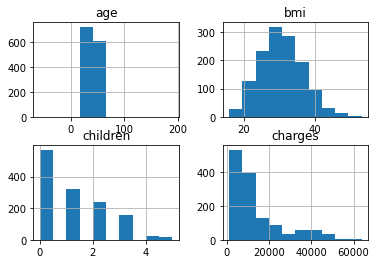

In [8]:
df.hist();

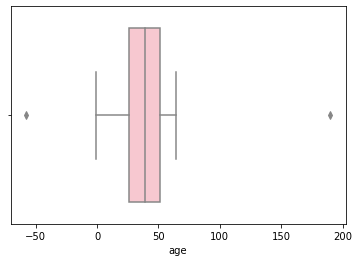

In [9]:
# finding outliers in age
sns.boxplot(x = df["age"], color = "pink");

age can never have outliers thus removing the same.

In [10]:
print("UPPER LIMIT",df['age'].mean() + 3*df['age'].std())
print("LOWER LIMIT",df['age'].mean() - 3*df['age'].std())

UPPER LIMIT 84.05930852972162
LOWER LIMIT -5.711940108668976


In [11]:
df = df[(df['age'] < 84) & (df['age'] > 0)]
df.shape

(1325, 8)

In [12]:
# finding min, max, and mean charge in dataset
print('Minimum charges',min(df['charges']))
print('Maximum charges',max(df['charges']))
print('Average charges',(df['charges'].mean()))

Minimum charges 1121.8739
Maximum charges 63770.42801
Average charges 13285.060990127544


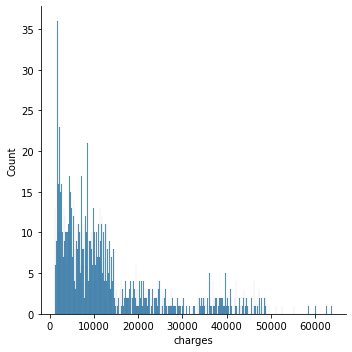

In [13]:
# distribution of charges
sns.displot(df, x = 'charges', bins = 500);

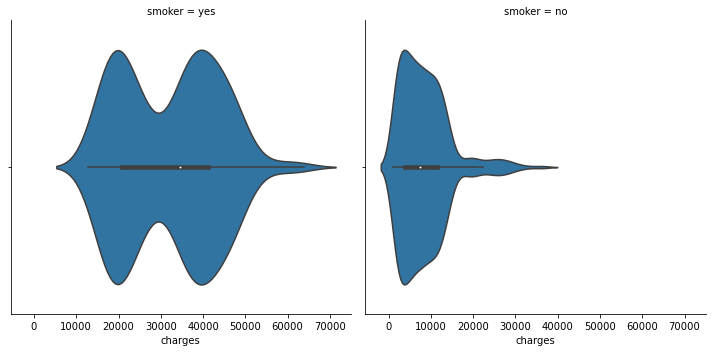

In [14]:
# Distribution of charges
#fig, ax = plt.subplots(figsize= (10, 5))               
sns.catplot(x = 'charges', data = df, kind = 'violin', col = 'smoker')

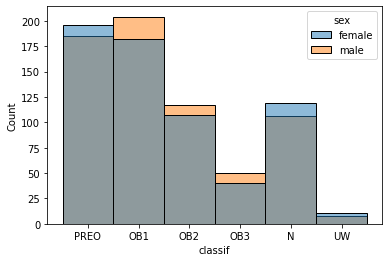

In [15]:
#fig,ax = plt.subplots(figsize = (20, 5))
sns.histplot(x = df["classif"], hue = df["sex"]);

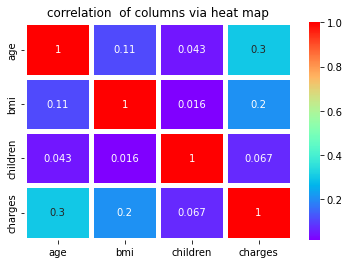

In [16]:
# heap map will show the correlation of columns

#fig, ax = plt.subplots(figsize = (20, 2))
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True, linewidth = 5).set_title('correlation  of columns via heat map')
plt.show()

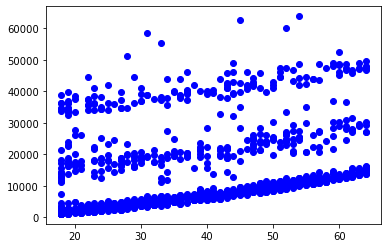

In [17]:
# correlation between age and charges is 0.3, which is although positive yet higher as compared to other correlations.
# scatter plot for age and charges

plt.scatter(df.age, df.charges, color = 'blue');

#### droping columns which seems not to directly effect the prediction

In [18]:
# bmi and classif columns represents same aspect, thus selecting classif only and removing bmi
df_a = df.drop(['sex', 'children', 'bmi'], axis = 1)
df_a.head()

,age,classif,smoker,region,charges
0,19,PREO,yes,southwest,16884.9240
1,18,OB1,no,southeast,1725.5523
2,28,OB1,no,southeast,4449.4620
4,32,PREO,no,northwest,3866.8552
5,31,PREO,no,southeast,3756.6216


In [19]:
# applying label encoder to smoker and classif column

from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer

encoder_1 = preprocessing.LabelEncoder()
encoder_1.fit(df_a.smoker)
print(encoder_1.classes_)
df_a.smoker = encoder_1.transform(df_a.smoker)

#*********************************************************************

encoder_2 = preprocessing.LabelEncoder()
encoder_2.fit(df_a.classif)
print(encoder_2.classes_)
df_a.classif = encoder_2.transform(df_a.classif)

df_a.head()

['no' 'yes']
['N' 'OB1' 'OB2' 'OB3' 'PREO' 'UW']


,age,classif,smoker,region,charges
0,19,4,1,southwest,16884.9240
1,18,1,0,southeast,1725.5523
2,28,1,0,southeast,4449.4620
4,32,4,0,northwest,3866.8552
5,31,4,0,southeast,3756.6216


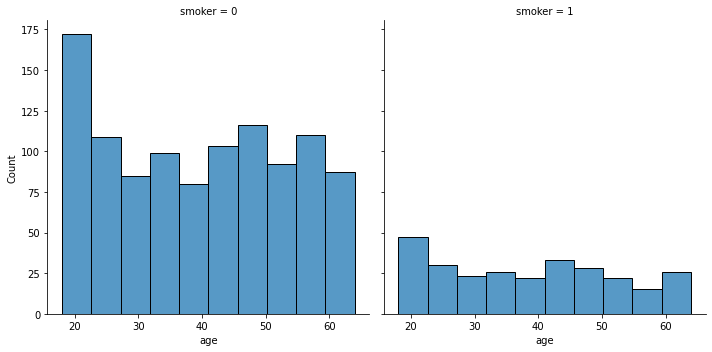

In [20]:
data_1 = df_a[(df_a["smoker"] == 0) | (df_a["smoker"] == 1)]
g = sns.FacetGrid(data_1, col = "smoker", height = 5)
g.map(sns.histplot, "age", bins = 10);

<AxesSubplot:xlabel='classif', ylabel='Density'>

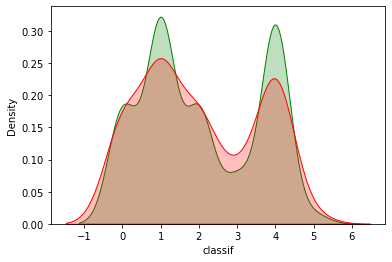

In [21]:
sns.kdeplot(df_a[df_a['smoker'] == 0]['classif'], shade = True, color = 'green')
sns.kdeplot(df_a[df_a['smoker'] == 1]['classif'], shade = True, color = 'red')

In [22]:
df_scale = df_a

from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

scale_columns = ['age', 'classif', 'smoker', 'charges']
df_scale[scale_columns] = minmax.fit_transform(df_a[scale_columns])
df_scale.head()

,age,classif,smoker,region,charges
0,0.021739,0.8,1.0,southwest,0.251611
1,0.000000,0.2,0.0,southeast,0.009636
2,0.217391,0.2,0.0,southeast,0.053115
4,0.304348,0.8,0.0,northwest,0.043816
5,0.282609,0.8,0.0,southeast,0.042056


In [23]:
# features and variables
X = df_scale.iloc[:, 0:3]
y = df_scale.iloc[:, -1]

# spliting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

### LINEAR REGRESSION

In [24]:
# LINEAR REGRESSION
# fitting the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)

In [25]:
# LINEAR REGRESSION
# predicting the model
lr_pred = lr.predict(X_test)
#print('the predicted values for test dependent: ', pred_test_2)

In [26]:
# LINEAR REGRESSION
from sklearn import metrics

print("MAE for test data: ", metrics.mean_absolute_error(y_test, lr_pred))
print("MSE for test data: ", metrics.mean_squared_error(y_test, lr_pred))
print("RMSE for test data: ", np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R2 for test data: ', metrics.r2_score(y_test, lr_pred))

MAE for test data:  0.07104354773252787
MSE for test data:  0.011727076735632343
RMSE for test data:  0.10829162818811222
R2 for test data:  0.7360824475290844


In [27]:
# LINEAR REGRESSION

l_charges = df_scale['charges']
l_predict = pd.Series(lr_pred)
l_error = l_charges - l_predict
l_data = {'CHARGES': l_charges, 'PREDICTION': l_predict, 'ERROR': l_error}
l_data = pd.DataFrame(l_data)
l_data.head(3)

,CHARGES,PREDICTION,ERROR
0,0.251611,0.049450,0.202160
1,0.009636,0.177018,-0.167382
2,0.053115,0.505421,-0.452306


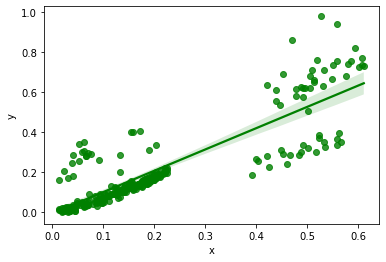

In [28]:
# LINEAR REGRESSION
# plot of prediction on test data
sns.regplot(x = lr_pred, y = y_test, color = "green")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### RandomForestRegressor

In [29]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
rf = RandomForestRegressor(n_estimators = 1000, random_state = 20)
 
# fit the regressor with x and y data
rf.fit(X, y) 

RandomForestRegressor(n_estimators=1000, random_state=20)

In [30]:
# RandomForestRegressor
# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

In [31]:
# RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), rf_pred)
print('Mean Absolute Error:', round(mae, 2))

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), rf_pred)
print('Mean Squared Error:', round(mse, 2))

# R-squared scores
r2 = r2_score(y_test.values.ravel(), rf_pred)
print('R-squared scores:', round(r2, 2))

# root mean squared error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test.values.ravel(), rf_pred))
print('RMSE:', round(rmse, 2))

Mean Absolute Error: 0.04
Mean Squared Error: 0.0
R-squared scores: 0.91
RMSE: 0.06


In [32]:
# RandomForestRegressor

r_charges = df_scale['charges']
r_predict = pd.Series(rf_pred)
r_error = r_charges - r_predict
r_data = {'CHARGES': r_charges, 'PREDICTION': r_predict, 'ERROR': r_error}
r_data = pd.DataFrame(r_data)
r_data.head(3)

,CHARGES,PREDICTION,ERROR
0,0.251611,0.076963,0.174647
1,0.009636,0.180041,-0.170406
2,0.053115,0.668179,-0.615064


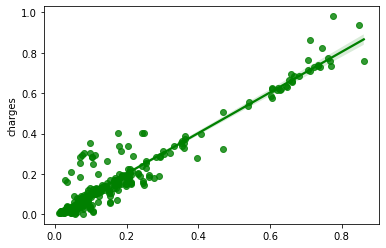

In [33]:
# RandomForestRegressor
# plot of predictions on test data
sns.regplot(rf_pred, y_test, color="green")
plt.show()

### Support Vector Regression

In [34]:
# Support Vector Regression
#X = df_scale.iloc [:, : -1]
#y = df_scale.iloc [:, -1 :]

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')#, C = 1e3, gamma = 0.1
svr_pred = svr.fit(X, y).predict(X)
svr_pred

array([0.33390044, 0.09989379, 0.12623974, ..., 0.09989379, 0.10045304,
       0.10579531])

In [35]:
# Support Vector Regression
svr_pred = svr.predict(X_test)
#svr_pred

In [36]:
# Support Vector Regression
print("MAE for test data: ", metrics.mean_absolute_error(y_test, svr_pred))
print("MSE for test data: ", metrics.mean_squared_error(y_test, svr_pred))
print("RMSE for test data: ", np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R2 for test data: ', metrics.r2_score(y_test, svr_pred))

MAE for test data:  0.08637609321639263
MSE for test data:  0.008862003965734276
RMSE for test data:  0.09413821734946055
R2 for test data:  0.8005608346095618


In [37]:
# Support Vector Regression

s_charges = df_scale['charges']
s_predict = pd.Series(svr_pred)
s_error = s_charges - s_predict
s_data = {'CHARGES': s_charges, 'PREDICTION': s_predict, 'ERROR': s_error}
s_data = pd.DataFrame(s_data)
s_data.head(3)

,CHARGES,PREDICTION,ERROR
0,0.251611,0.119582,0.132029
1,0.009636,0.234792,-0.225156
2,0.053115,0.635686,-0.582571


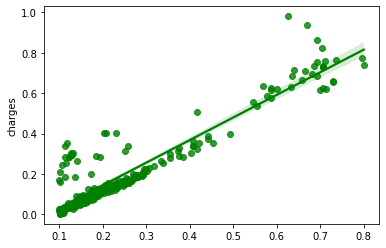

In [38]:
# Support Vector Regression
# plot of predictions to test data
sns.regplot(svr_pred, y_test, color="green")
plt.show()

### DECISION TREE REGRESSOR

In [39]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dtr = DecisionTreeRegressor(max_depth = 3,
                           min_samples_split = 5,
                           max_leaf_nodes = 15)

dtr.fit(X_train,y_train)
print("R-Squared on train dataset = {}".format(dtr.score(X_test,y_test)))

dtr.fit(X_test,y_test)   
print("R-Squared on test dataset = {}".format(dtr.score(X_test,y_test)))

R-Squared on train dataset = 0.8475615480707477
R-Squared on test dataset = 0.8832689260943477


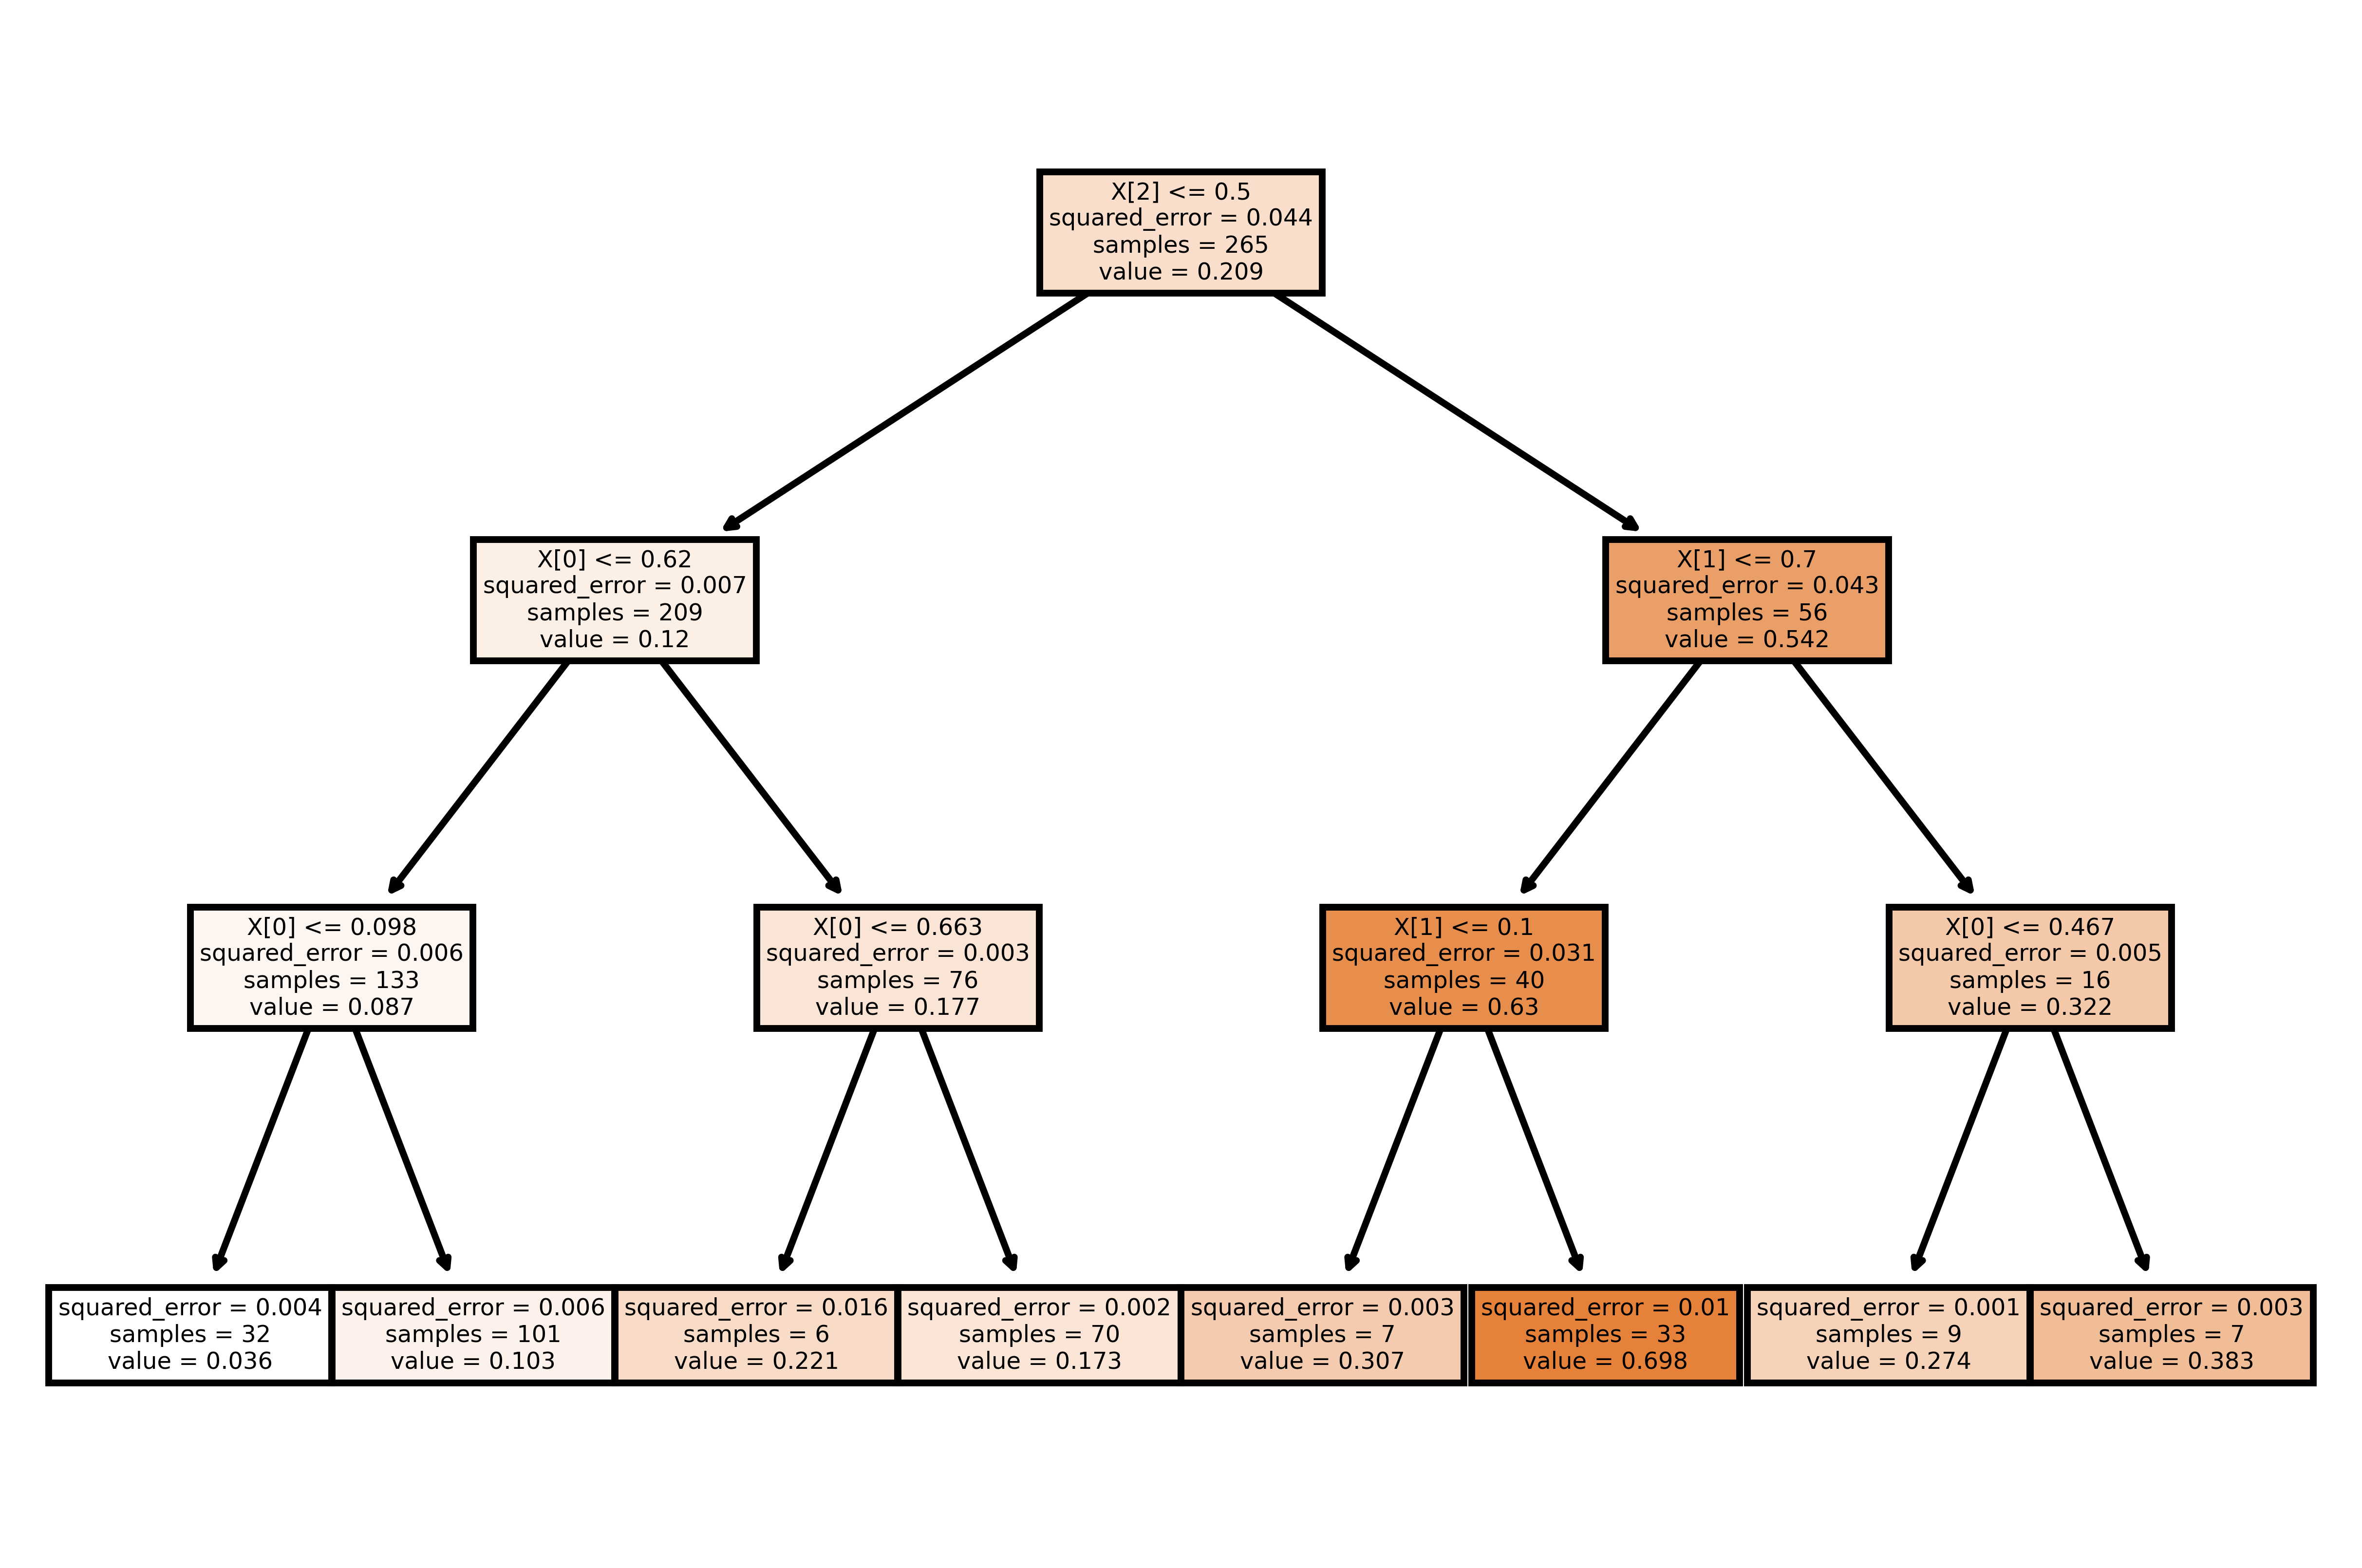

In [40]:
# DECISION TREE
# Setting dpi = 1000 to make image clearer than default
fig, axes = plt.subplots(dpi = 1000)

tree.plot_tree(dtr,
           filled = True);

#save figure in current directory as png
fig.savefig('Decision_Tree.png')

In [41]:
# DECISION TREE
extracted_MSEs = dtr.tree_.impurity

for idx, MSE in enumerate(dtr.tree_.impurity):
    print("Node {} has MSE {}".format(idx, round(MSE, 3)))

Node 0 has MSE 0.044
Node 1 has MSE 0.007
Node 2 has MSE 0.043
Node 3 has MSE 0.031
Node 4 has MSE 0.005
Node 5 has MSE 0.003
Node 6 has MSE 0.01
Node 7 has MSE 0.006
Node 8 has MSE 0.003
Node 9 has MSE 0.004
Node 10 has MSE 0.006
Node 11 has MSE 0.001
Node 12 has MSE 0.003
Node 13 has MSE 0.016
Node 14 has MSE 0.002


In [42]:
# conclusion

In [43]:
print('CHARGES VS PREDICTIONS')
charges = df_scale['charges']
data = {'CHARGES': charges, 'LINEAR': l_predict, 'RAMDOM FOREST': r_predict, 'SVR': s_predict}
data = pd.DataFrame(data)
data.head(3)

CHARGES VS PREDICTIONS


,CHARGES,LINEAR,RAMDOM FOREST,SVR
0,0.251611,0.049450,0.076963,0.119582
1,0.009636,0.177018,0.180041,0.234792
2,0.053115,0.505421,0.668179,0.635686


In [44]:
print('R-SQUARED VALUES OF ALL REGRESSOR MODELS:')
print('LINEAR: ', round(metrics.r2_score(y_test, lr_pred), 3))
print('RANDOM FOREST: ', round(r2, 3))
print('SVR: ', round(metrics.r2_score(y_test, svr_pred), 3))
print("DECISION TREE: ", round(dtr.score(X_test, y_test), 3))

R-SQUARED VALUES OF ALL REGRESSOR MODELS:
LINEAR:  0.736
RANDOM FOREST:  0.913
SVR:  0.801
DECISION TREE:  0.883


In [45]:
print('MSE VALUES OF ALL REGRESSOR MODELS:')
print('LINEAR: ', round(metrics.mean_squared_error(y_test, lr_pred), 3))
print('RANDOM FOREST: ', round(mse, 3))
print('SVR: ', round(metrics.mean_squared_error(y_test, svr_pred), 3))

MSE VALUES OF ALL REGRESSOR MODELS:
LINEAR:  0.012
RANDOM FOREST:  0.004
SVR:  0.009


In [46]:
print('RMSE VALUES OF ALL REGRESSOR MODELS:')
print('LINEAR: ', round(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)), 3))
print('RANDOM FOREST: ', round(rmse, 3))
print('SVR: ', round(np.sqrt(metrics.mean_squared_error(y_test, svr_pred)), 3))

RMSE VALUES OF ALL REGRESSOR MODELS:
LINEAR:  0.108
RANDOM FOREST:  0.062
SVR:  0.094


In [47]:
print('MAE VALUES OF ALL REGRESSOR MODELS:')
print('LINEAR: ', round(metrics.mean_absolute_error(y_test, lr_pred), 3))
print('RANDOM FOREST: ', round(mae, 3))
print('SVR: ', round(metrics.mean_absolute_error(y_test, svr_pred), 3))

MAE VALUES OF ALL REGRESSOR MODELS:
LINEAR:  0.071
RANDOM FOREST:  0.037
SVR:  0.086


### R2 is highest at RANDOM FOREST REGRESSION, but MSE, RMSE, MAE is comparatively low.
### seond highest R2 is scores under DECISION TREE REGRESSION.
### LINEAR REGRESSION shows slighly low metrics value.
### where as SUPPORT VECTOR REGRESSION is showing consistency in all metrics.

## final selection should be SUPPORT VECTOR REGRESSION.